In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Gradient descent is used to (hopefully) find the global minimum of a differentiable function.

Suppose we want to find the minimum of the function 
$$f(x) = (x-10)^{2} $$
The function looks like this:

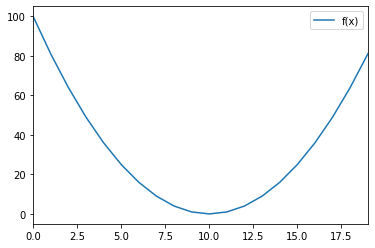

In [2]:
df = pd.DataFrame(index = np.arange(0, 20))
df['f(x)'] = df.index.map(lambda x: (x-10)**2)
df.plot()
plt.show()

You might remember from calculus, you can find the minimum of a function  by finding where its derivative is equal to zero.
The derivative of our function here is
$$f'(x) = 2*(x-10)$$

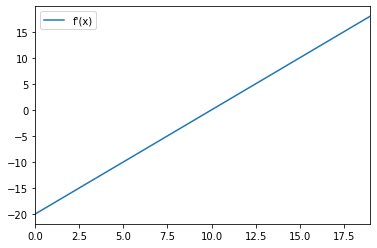

In [3]:
df = pd.DataFrame(index = np.arange(0, 20))
df["f'(x)"] = df.index.map(lambda x: 2*(x-10))
df.plot()
plt.show()

What we want to do now is given a starting point x, and a learning rate g, move against the gradient of f(x) at a rate of g, to find the minimum of f(x). If step sizes start getting too small, because we're approaching the minimum (set this cutoff via precision), end the loop. 

In [101]:
y_gradient = lambda x: 2*(x-10)
x = 5
maximum_iterations = 100
learning_rate = .1
cost_history = []
precision = .001

for i in range(maximum_iterations):
    cost = (x - 10)**2
    cost_history.append(cost)
    x -= learning_rate * y_gradient(x)
    #previous_step_size = abs(current_x - previous_x)
    #current_iteration += 1
    print(f'Iteration {i}',f'x is {x}')
    if cost < precision:
        break

   

Iteration 0 x is 6.0
Iteration 1 x is 6.8
Iteration 2 x is 7.4399999999999995
Iteration 3 x is 7.952
Iteration 4 x is 8.3616
Iteration 5 x is 8.68928
Iteration 6 x is 8.951424
Iteration 7 x is 9.1611392
Iteration 8 x is 9.32891136
Iteration 9 x is 9.463129087999999
Iteration 10 x is 9.5705032704
Iteration 11 x is 9.65640261632
Iteration 12 x is 9.725122093056
Iteration 13 x is 9.7800976744448
Iteration 14 x is 9.82407813955584
Iteration 15 x is 9.859262511644673
Iteration 16 x is 9.887410009315738
Iteration 17 x is 9.90992800745259
Iteration 18 x is 9.927942405962073
Iteration 19 x is 9.942353924769659
Iteration 20 x is 9.953883139815726
Iteration 21 x is 9.963106511852581
Iteration 22 x is 9.970485209482066
Iteration 23 x is 9.976388167585652


This is nice, but how does it apply to actual machine learning?
Lets look at how it can be used in linear regression to find optimal parameter values m and b.
$$ y = mx+ b $$
We want to find m, b that minimize the mean squared error function:
$$ \frac{1}{2n} \sum_{i=0}^{n} (mx + b - y)^2 $$

Note that the 2 in the denominator isn't necessary for mean squared error, but is conventionally used in this context to make differentiation a bit easier.
Lets now find the partial derivatives of this for m and b:
$$ \frac{\partial f}{\partial m} (\frac{1}{2n} \sum_{i=0}^{n} (mx + b - y)^2 )  = \frac{1}{n} \sum_{i=0}^{n} (mx+b-y)*x$$
and 
$$ \frac{\partial f}{\partial b} (\frac{1}{2n} \sum_{i=0}^{n} (mx + b - y)^2 )  = \frac{1}{n} \sum_{i=0}^{n} (mx+b-y)$$

where $ mx+b-y $ is the error from the cost function

In [82]:
class LinearRegression:
    def __init__(self, alpha = .1, precision = .01, max_iterations = 500):
        self.m = 0
        self.b = 0
        self.error_history = []
        self.cost_history = []
        self.max_iterations = max_iterations
        self.alpha = alpha
        self.precision = precision

    def fit(self, x, y):
        n_samples, n_features = np.shape(x)
        self.m = np.ones(n_features)
        x_transposed = x.transpose()
        
        for i in range(self.max_iterations):
            error = (np.dot(x, self.m) + self.b) - y #+ self.b

            cost = np.sum(error ** 2) / (2 * n_samples)
            self.cost_history.append(cost)

            self.m -= self.alpha * (np.dot(x_transposed, error) / n_samples)
            self.b -= self.alpha * (error.sum() / n_samples)
            if cost < self.precision:
                break

    def predict(self, x):
        return np.dot(x,self.m) + self.b

In [80]:
x = np.arange(-1,1,step=.1).reshape(20,1)
y = x *3 + 2 + np.random.normal()
lr = LinearRegression()
lr.fit(x, y.ravel())
print(f"m = {lr.m}",f"b = {lr.b}")

m = [1.05281975] b = 0.2736050406265256


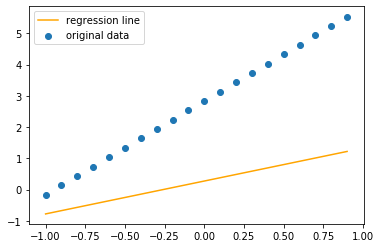

In [81]:
plt.scatter(x,y,label='original data')
plt.plot(x,lr.predict(x),label='regression line',c='orange')
plt.legend()
plt.show()

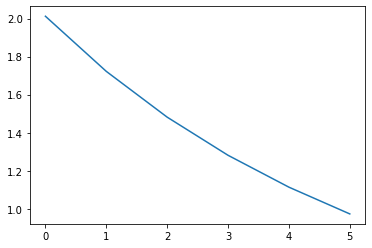

In [78]:
plt.plot(lr.cost_history)
plt.show()

The model sucessfully converges on m and b using gradient descent.

Now lets try this on a real dataset with multiple features:

In [60]:
def normalize(x):
    return (x - x.mean()) / x.std()


data = load_boston()
x = data['data']
y = data['target']

x = np.apply_along_axis(normalize,arr=x,axis=0)
y = np.apply_along_axis(normalize,arr=y,axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state=2)


lr = LinearRegression()
lr.fit(X_train, y_train.ravel())
print("MSE = " + str(round(mean_squared_error(y_test, lr.predict(X_test)),4)))

MSE = 0.2191


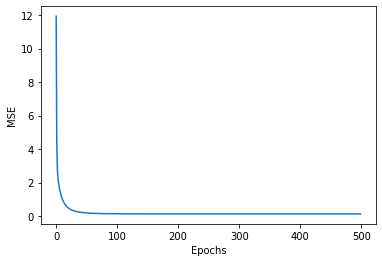

In [61]:
plt.plot(lr.cost_history)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()